### Rain in Australia


In [1]:
# imports
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import math
import datetime

In [2]:
# load data
path = Path('data', 'weatherAUS.csv')
df = pd.read_csv(path)
df.head()
n_columns = len(df.columns)
variables = df.columns[:-1]
target_var = df.columns[-1]


In [3]:
# in any case, we can drop all rows where the target variable (rainTomorrow) is NaN, for obvious reasons
assert(df[target_var].isna().sum() != 0)
df.dropna(subset=target_var, inplace=True)
assert(df[target_var].isna().sum() == 0)

# we consider rows with 4 or more nan values as possible too inaccurate, so we drop those immediately
df.dropna(thresh=n_columns-4, inplace=True)

df.Date = pd.to_datetime(df.Date).astype('int64')
df.Date = (df.Date - df.Date.mean()) / df.Date.std()


# also, wind directions are given in string format
def order_by_cardinal_dir(vals):
    directions = {'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3, 'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7, 'S': 8, 'SSW': 9, 'SW': 10, 'WSW': 11, 'W': 12, 'WNW': 13, 'NW': 14, 'NNW': 15}
    return vals.map(directions)

df['WindGustDirOrdered'] = order_by_cardinal_dir(df['WindGustDir'])
df['WindDir9amOrdered'] = order_by_cardinal_dir(df['WindDir9am'])
df['WindDir3pmOrdered'] = order_by_cardinal_dir(df['WindDir3pm'])

df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDirOrdered,WindDir9amOrdered,WindDir3pmOrdered
count,1.233690e+05,123291.000000,123336.000000,122934.000000,80286.000000,73809.000000,119154.000000,123306.000000,123337.000000,122948.000000,122368.000000,122727.000000,122777.000000,84428.000000,82370.000000,123281.000000,122733.000000,119141.000000,119468.000000,122928.000000
mean,2.681619e-15,12.559861,23.506627,2.367006,5.464882,7.629967,40.403125,14.631518,19.238825,68.061798,51.245219,1017.548650,1015.164803,4.435116,4.504225,17.314647,21.932227,7.513148,7.205176,7.600530
std,1.000000e+00,6.289660,6.979762,8.550311,4.141539,3.780383,13.394602,8.637416,8.654958,18.915674,20.723357,7.073007,7.008024,2.882471,2.719438,6.389805,6.796426,4.459557,4.644279,4.455576
min,-2.131392e+00,-8.200000,2.600000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-3.100000,1.700000,0.000000,0.000000,0.000000
25%,-8.848280e-01,8.000000,18.100000,0.000000,2.600000,4.900000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.900000,1010.400000,1.000000,2.000000,12.500000,16.800000,4.000000,3.000000,4.000000
50%,5.769623e-02,12.300000,22.900000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,69.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.900000,21.300000,8.000000,7.000000,8.000000
75%,8.634024e-01,17.100000,28.500000,0.800000,7.400000,10.600000,48.000000,20.000000,24.000000,82.000000,65.000000,1022.300000,1019.900000,7.000000,7.000000,21.900000,26.600000,11.000000,11.000000,11.000000
max,1.695169e+00,33.900000,48.100000,371.000000,82.400000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,15.000000,15.000000,15.000000


Date                      0
Location                  0
MinTemp                  78
MaxTemp                  33
Rainfall                435
Evaporation           43083
Sunshine              49560
WindGustDir            4228
WindGustSpeed          4215
WindDir9am             3901
WindDir3pm              441
WindSpeed9am             63
WindSpeed3pm             32
Humidity9am             421
Humidity3pm            1001
Pressure9am             642
Pressure3pm             592
Cloud9am              38941
Cloud3pm              40999
Temp9am                  88
Temp3pm                 636
RainToday               435
RainTomorrow              0
WindGustDirOrdered     4228
WindDir9amOrdered      3901
WindDir3pmOrdered       441
dtype: int64


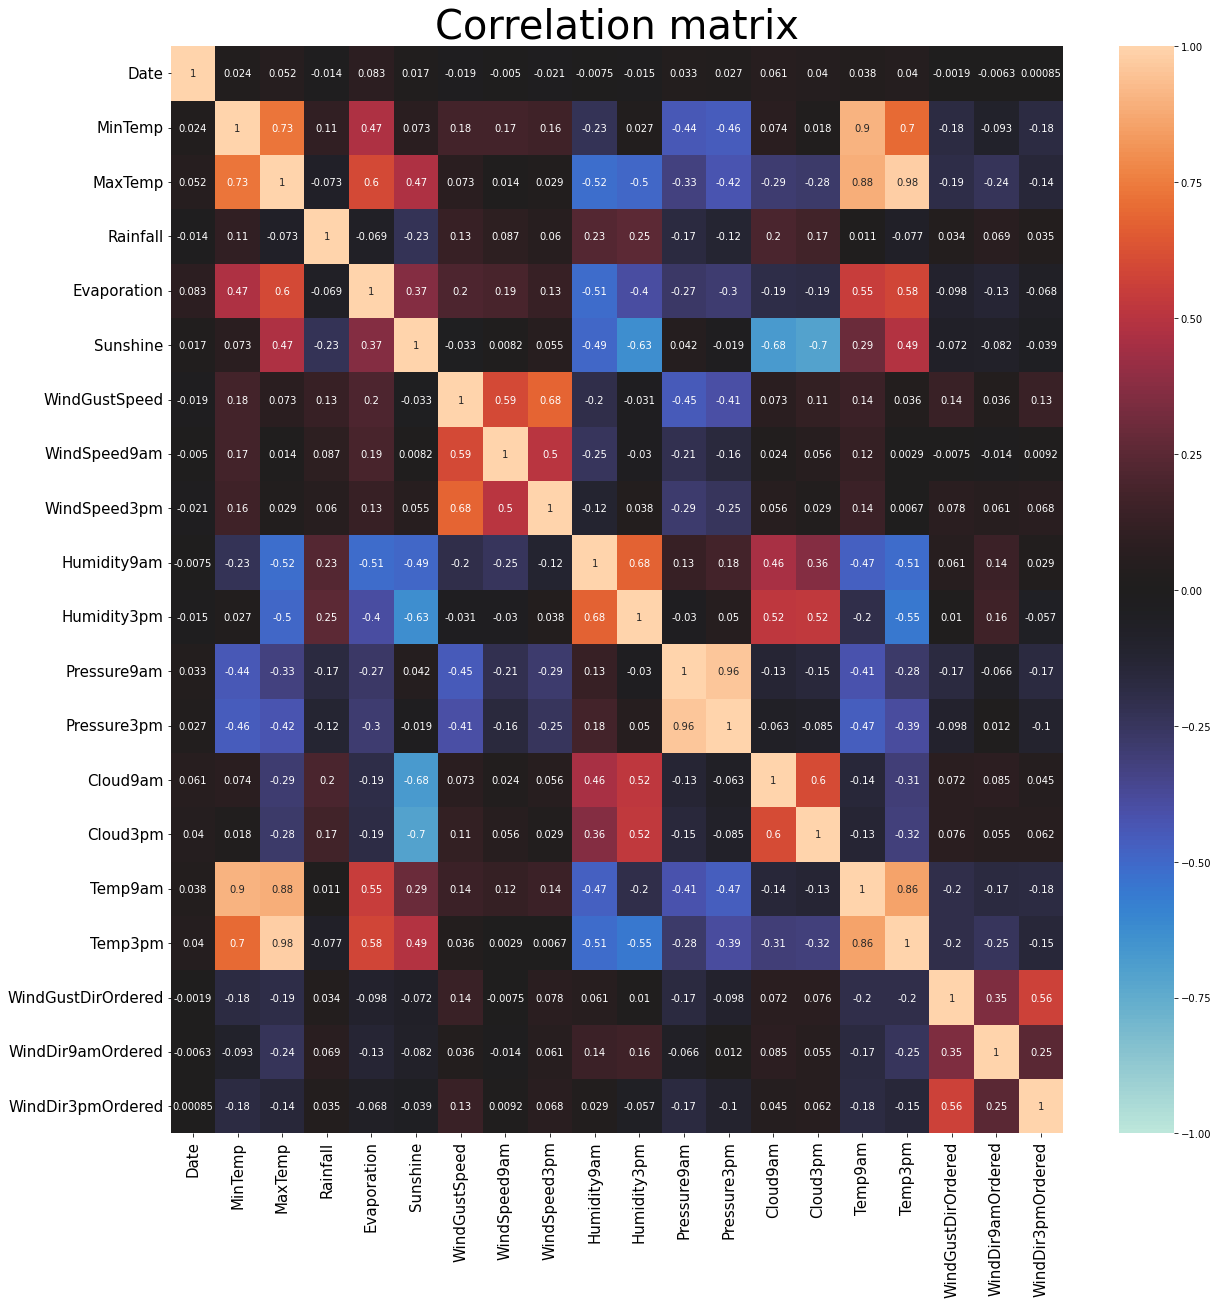

In [4]:
# data inspection
print(df.isna().sum())
plt.figure(figsize= (20,20))
matrix = sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = 1, center = 0)
matrix.axes.set_title('Correlation matrix', fontsize = 40)
matrix.tick_params(labelsize=15)

In [5]:
#df.dropna(inplace=True)
#sns.pairplot(df.sample(1000))
#plt.show()

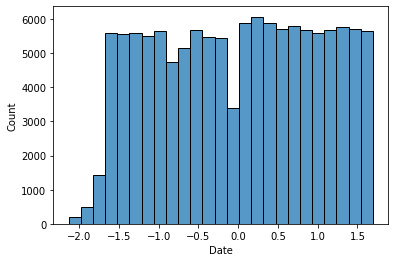

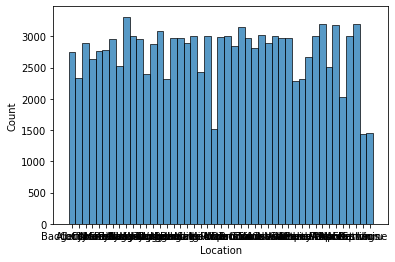

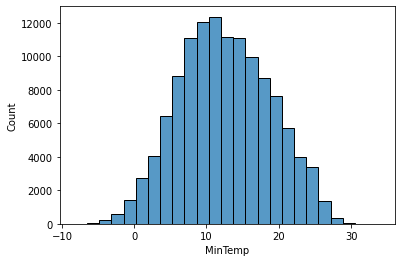

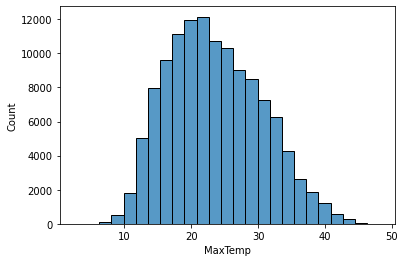

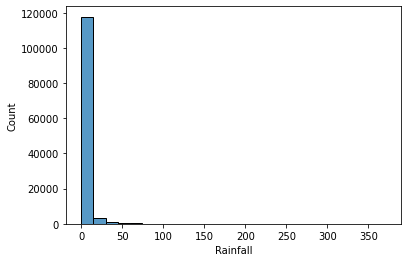

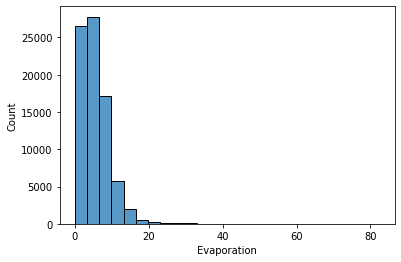

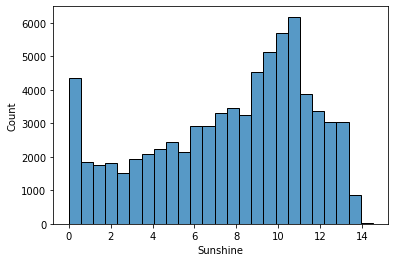

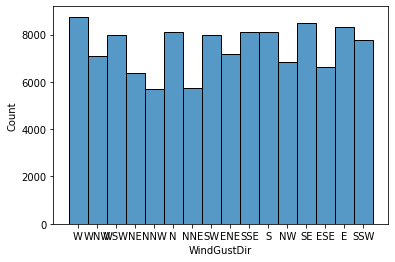

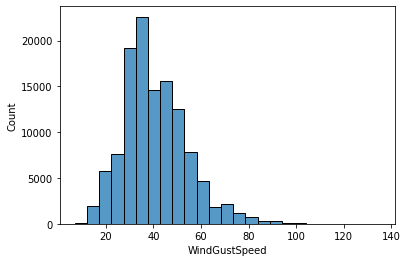

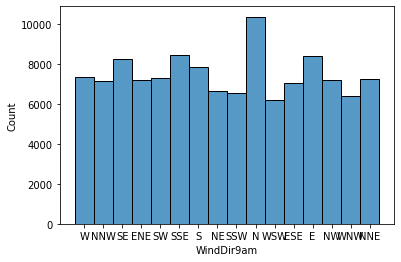

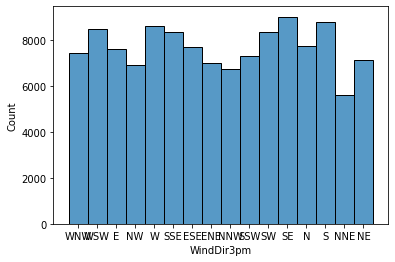

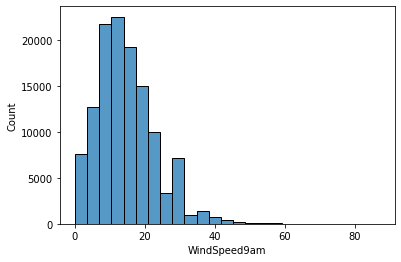

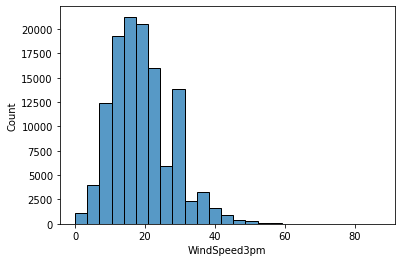

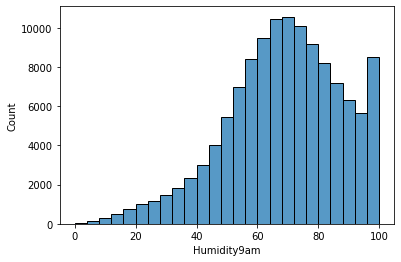

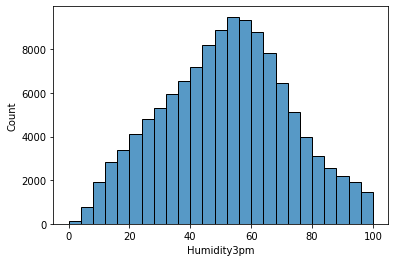

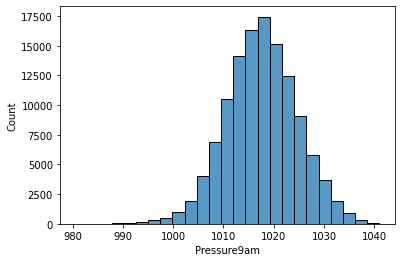

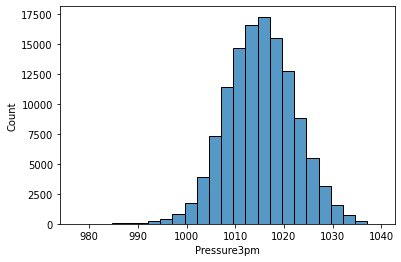

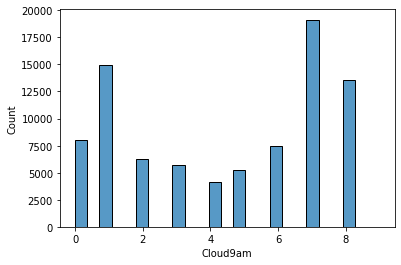

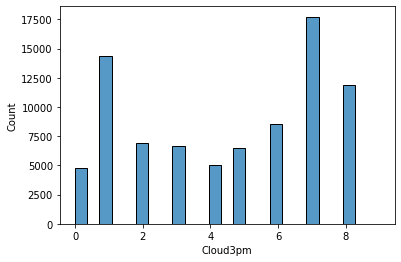

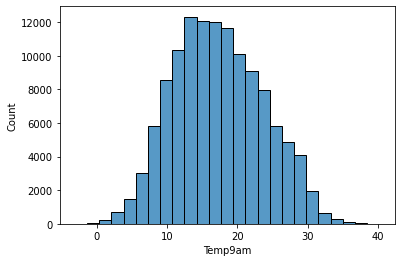

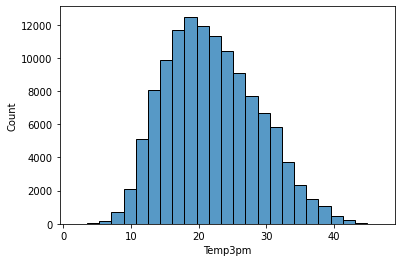

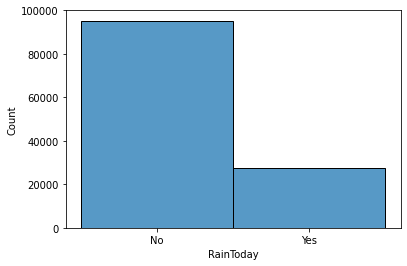

In [6]:
#df = df.sample(n=1000)
for var in variables:
    sns.histplot(data=df[var], bins=25, )
    plt.show()

In [7]:
# Drop the rows with outliers in the Rainfall and Evaporation column
prev_len = df.shape[0]
df = df[df['Rainfall'] < 250]
assert (df.shape[0] < prev_len)
prev_len = df.shape[0]
df = df[df['Evaporation'] < 60]
assert (df.shape[0] < prev_len)


In [8]:
# Replace NaN-values in WindGustDir by WindDir3pm, because those have the same data type and correlate somewhat highly (0.59, see correlation matrix)
df.WindGustDir.fillna(df.WindDir3pm, inplace=True)
df.WindDir3pm.fillna(df.WindGustDir, inplace=True)
df.WindDir9am.fillna(df.WindDir3pm, inplace=True)

In [9]:
# next feature is evaporation: we just replace the nans with the median
_ = df['Evaporation'].fillna(df['Evaporation'].median())

In [10]:
# next feature is sunshine: we just replace the nans with the median
_ = df['Sunshine'].fillna(df['Sunshine'].mean())

In [11]:
df.Cloud3pm.fillna(df.Cloud9am, inplace=True)
df.Cloud9am.fillna(df.Cloud3pm, inplace=True)


In [12]:
df.dropna(inplace=True)
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDirOrdered,WindDir9amOrdered,WindDir3pmOrdered
count,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000,57993.000000
mean,-0.176303,13.369902,24.181755,2.100226,5.496106,7.754200,40.856707,15.649751,19.767748,65.884020,49.466591,1017.281434,1014.839222,4.236201,4.318383,18.131831,22.675421,7.256272,6.992465,7.423155
std,0.971451,6.429277,6.980851,6.946351,3.644347,3.753642,13.315999,8.310465,8.496819,18.571075,20.230933,6.917273,6.873611,2.799431,2.654261,6.570873,6.844088,4.416640,4.596878,4.413689
min,-2.131392,-6.900000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-1.000000,3.700000,0.000000,0.000000,0.000000
25%,-1.041191,8.500000,18.700000,0.000000,2.800000,5.100000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.000000,17.300000,4.000000,3.000000,4.000000
50%,-0.226798,13.100000,23.800000,0.000000,5.000000,8.700000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.700000,22.300000,7.000000,7.000000,7.000000
75%,0.649489,18.300000,29.600000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.900000,1019.500000,7.000000,7.000000,23.200000,27.900000,11.000000,11.000000,11.000000
max,1.695169,31.400000,48.100000,206.200000,59.800000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,15.000000,15.000000,15.000000


In [13]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDirOrdered,WindDir9amOrdered,WindDir3pmOrdered
6049,-1.667731,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,No,No,9.0,3.0,10.0
6050,-1.666645,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,8.0,7.0,7.0
6052,-1.664474,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,No,No,1.0,1.0,15.0
6053,-1.663388,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,No,No,13.0,13.0,11.0
6054,-1.662302,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,No,No,13.0,14.0,13.0


In [14]:
card_dir_to_WE = {
    'N': 0, 'NNE': 0.382683, 'NE': 1 / math.sqrt(2), 'ENE': 0.923880, 'E': 1, 'ESE': 0.923880, 'SE': 1 / math.sqrt(2), 'SSE': 0.382683, 
    'S': 0, 'SSW': -0.382683, 'SW': -1 / math.sqrt(2), 'WSW': -0.923880, 'W': -1, 'WNW': -0.923880, 'NW': -1 / math.sqrt(2), 'NNW': -0.382683
}

card_dir_to_NS = {
    'W': 0, 'WNW': 0.382683, 'NW': 1 / math.sqrt(2), 'NNW': 0.923880, 'N': 1, 'NNE': 0.923880, 'NE': 1 / math.sqrt(2), 'ENE': 0.382683, 
    'E': 0, 'ESE': -0.382683, 'SE': -1 / math.sqrt(2), 'SSE': -0.923880, 'S': -1, 'SSW': -0.923880, 'SW': -1 / math.sqrt(2), 'WSW': -0.382683
}

# convert WindDir features to numerical
df['WindGustDir_x'] = df.WindGustDir.map(card_dir_to_WE)
df['WindGustDir_y'] = df.WindGustDir.map(card_dir_to_NS)

df['WindDir9am_x'] = df.WindDir9am.map(card_dir_to_WE)
df['WindDir9am_y'] = df.WindDir9am.map(card_dir_to_NS)

df['WindDir3pm_x'] = df.WindDir3pm.map(card_dir_to_WE)
df['WindDir3pm_y'] = df.WindDir3pm.map(card_dir_to_NS)

df.drop(labels=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindGustDirOrdered', 'WindDir9amOrdered', 'WindDir3pmOrdered'], axis=1, inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y
6049,-1.667731,Cobar,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,...,26.6,33.4,No,No,-0.382683,-0.923880,0.923880,0.382683,-0.707107,-0.707107
6050,-1.666645,Cobar,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,...,20.3,27.0,No,No,0.000000,-1.000000,0.382683,-0.923880,0.382683,-0.923880
6052,-1.664474,Cobar,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,...,28.7,34.9,No,No,0.382683,0.923880,0.382683,0.923880,-0.382683,0.923880
6053,-1.663388,Cobar,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,...,29.1,35.6,No,No,-0.923880,0.382683,-0.923880,0.382683,-0.923880,-0.382683
6054,-1.662302,Cobar,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,...,33.6,37.6,No,No,-0.923880,0.382683,-0.707107,0.707107,-0.923880,0.382683


In [15]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y
6049,-1.667731,Cobar,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,...,26.6,33.4,No,No,-0.382683,-0.923880,0.923880,0.382683,-0.707107,-0.707107
6050,-1.666645,Cobar,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,...,20.3,27.0,No,No,0.000000,-1.000000,0.382683,-0.923880,0.382683,-0.923880
6052,-1.664474,Cobar,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,...,28.7,34.9,No,No,0.382683,0.923880,0.382683,0.923880,-0.382683,0.923880
6053,-1.663388,Cobar,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,...,29.1,35.6,No,No,-0.923880,0.382683,-0.923880,0.382683,-0.923880,-0.382683
6054,-1.662302,Cobar,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,...,33.6,37.6,No,No,-0.923880,0.382683,-0.707107,0.707107,-0.923880,0.382683


In [18]:
# normalize every feature
cont_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
df[cont_vars] = (df[cont_vars] - df[cont_vars].min()) / (df[cont_vars].max() - df[cont_vars].min())
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y
6049,-1.667731,Cobar,0.647520,0.706818,0.0,0.200669,0.848276,0.339130,0.061538,0.243243,...,0.683168,0.700472,No,No,-0.382683,-0.923880,0.923880,0.382683,-0.707107,-0.707107
6050,-1.666645,Cobar,0.660574,0.563636,0.0,0.247492,0.896552,0.243478,0.261538,0.229730,...,0.527228,0.549528,No,No,0.000000,-1.000000,0.382683,-0.923880,0.382683,-0.923880
6052,-1.664474,Cobar,0.686684,0.761364,0.0,0.180602,0.731034,0.321739,0.430769,0.175676,...,0.735149,0.735849,No,No,0.382683,0.923880,0.382683,0.923880,-0.382683,0.923880
6053,-1.663388,Cobar,0.751958,0.779545,0.0,0.190635,0.841379,0.191304,0.061538,0.054054,...,0.745050,0.752358,No,No,-0.923880,0.382683,-0.923880,0.382683,-0.923880,-0.382683
6054,-1.662302,Cobar,0.812010,0.838636,0.0,0.187291,0.579310,0.226087,0.230769,0.148649,...,0.856436,0.799528,No,No,-0.923880,0.382683,-0.707107,0.707107,-0.923880,0.382683


In [17]:
df.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)